In [7]:
import os
import random
import cv2

In [25]:
from Preprocessing_Data.functions_preprocessing import combine_image_folders, erase_double_images, train_test

import License_Plate_Detection.functions_licenseplate as fl
import License_Plate_Detection.functions_yolo_licenseplate as yolo
import License_Plate_Detection.first_collab as meri

import Character_Detection.functions_recognition as r
import Character_Detection.Models.SVC as svc

import API_car_model as api

In [2]:
"""
source_folders = [
    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/FOTOS MERI",
    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/FOTOS",
    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/FOTOS LARA",
    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/Images (CV)/Frontal",
    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/Images (CV)/Lateral"
]

destination_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES'
combine_image_folders(source_folders, destination_folder) #ALREADY CREATED
"""

'\nsource_folders = [\n    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/FOTOS MERI",\n    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/FOTOS",\n    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/FOTOS LARA",\n    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/Images (CV)/Frontal",\n    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/Images (CV)/Lateral"\n]\n\ndestination_folder = \'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\'\ncombine_image_folders(source_folders, destination_folder) #ALREADY CREATED\n'

In [3]:
"""
folder_path = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES'
erase_double_images(folder_path)
"""

"\nfolder_path = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES'\nerase_double_images(folder_path)\n"

In [4]:
"""
source_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES'  
train_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset'    
test_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_testset'     
val_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_validationset'
# Call the train_test function to perform the split
train_test(source_folder, train_folder, test_folder, val_folder)
"""

"\nsource_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES'  \ntrain_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset'    \ntest_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_testset'     \nval_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_validationset'\n# Call the train_test function to perform the split\ntrain_test(source_folder, train_folder, test_folder, val_folder)\n"

In [5]:
"""
image_folder_2 = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset'
cropped_plates_train = yolo.boundingbox(image_folder_2)#dictionary name plate (sequence) + croppedd image
"""

"\nimage_folder_2 = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset'\ncropped_plates_train = yolo.boundingbox(image_folder_2)#dictionary name plate (sequence) + croppedd image\n"

In [6]:
"""
save_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset_croppedimages'
fl.display_and_save_cropped_plates(cropped_plates_train, save_folder)
"""

"\nsave_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset_croppedimages'\nfl.display_and_save_cropped_plates(cropped_plates_train, save_folder)\n"

In [20]:
#pc_lara = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset_croppedimages'
pc_miguel = 'G://.shortcut-targets-by-id//1xjrivG-T7lph1wnu1KGxnsESEs0U5vvV//LICENSE_PLATES_RECOGITION_L&V//GITHUB_trainset_croppedimages'


file_list = os.listdir(pc_miguel)
image_extensions = ['.jpg', '.jpeg', '.png']
image_files = [file for file in file_list if os.path.splitext(file)[1].lower() in image_extensions]

random_image = random.choice(image_files)
random_image_path = os.path.join(pc_miguel, random_image)
image = cv2.imread(random_image_path)
car = image.copy()

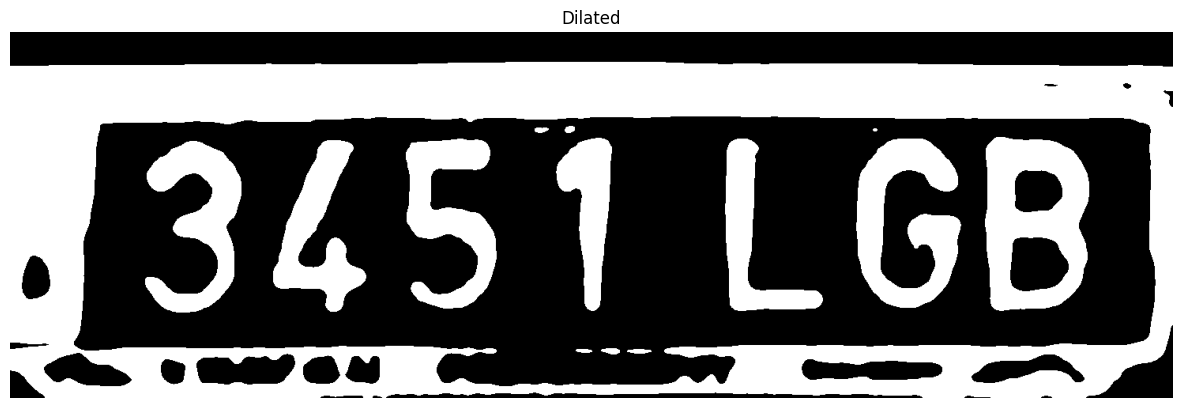

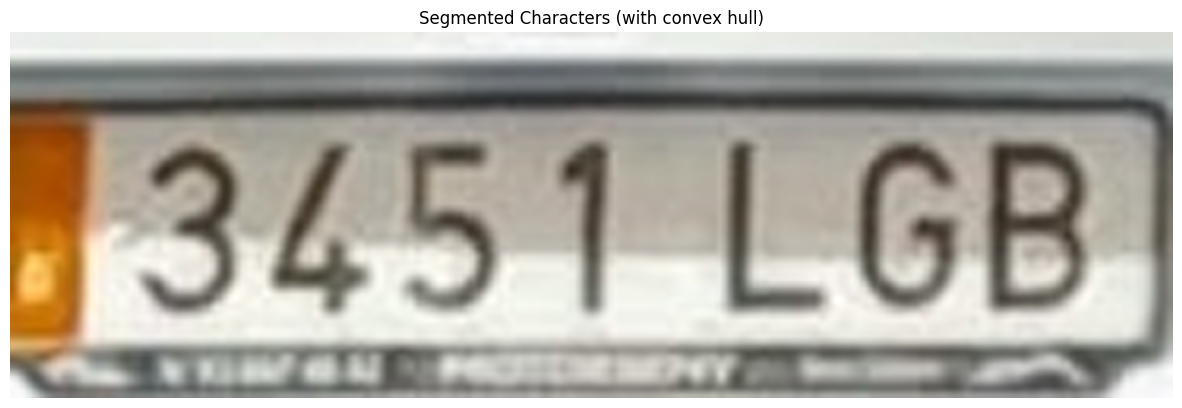

In [35]:
import Character_Detection.functions_recognition as r
characters = r.OCR_image(image)

In [24]:
base_path_lara = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Dataset Characters'
base_path_miguel = 'G://.shortcut-targets-by-id//1xjrivG-T7lph1wnu1KGxnsESEs0U5vvV//LICENSE_PLATES_RECOGITION_L&V//Dataset Characters'

accuracy, clf, scaler, label_encoder = svc.train_svm_and_get_accuracy(base_path_miguel)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 86.00%


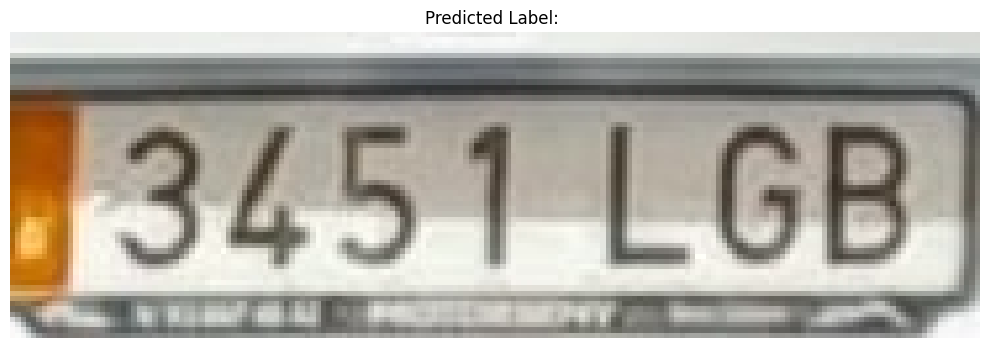

In [27]:
import matplotlib.pyplot as plt
plate_sol = svc.test_preprocessed_images_with_plot(clf, scaler, characters, label_encoder)
plt.imshow(car, cmap='gray')
plt.title(f"Predicted Label: {plate_sol}")
plt.axis('off')  # Hide axes
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show the plot